# Simulation 4

**Mengqi Liu**

**Jul 20， 2023**

In [1]:
import numpy as np
import utils
import linear
import pandas as pd
import scipy
import math
import scipy
import matplotlib.pyplot as plt

## Setting


- $d$: number of nodes 
- $s0$: expected number of edges 
- graph\_type: ER
    - ER: Erdős-Rényi Graph randomly choose one from all graphs with $d$ nodes and $s0$ edges + random orientation
    
- $n$: number of samples, n=inf mimics population risk 
- sem\_type: gauss, exp, gumbel, uniform
- loss\_type: l2
- lambda1: penalty for sparsity
- Here I use MCMC to simulate for 20 times or for 6 times.
- losses:
    - $h(W)=0$: constraint function
    - loss\_est: loss decided by loss\_type
    - loss\_l1: loss\_est + l1 penalty
    - obj\_new: + quadratic penalty of $h$
    - obj\_dual: dual function pertaining to obj\_new with Lagrange multiplier $\alpha$

## Results

### Experiment 1

Here I set lambda1 $=0$, $d \in \{10, 20, 40, 60, 80\}$, $n=10$ and $s0=d$.


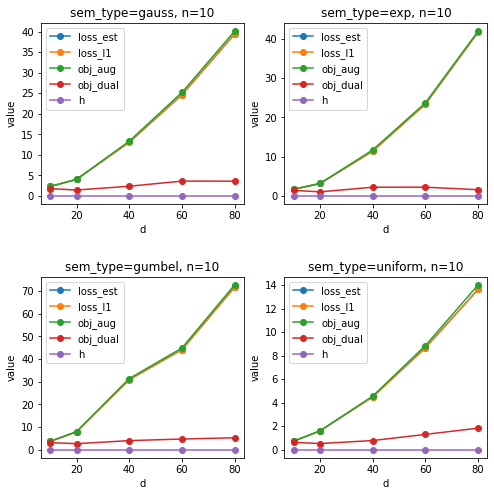

In [10]:
for i in range(20):
    if i == 0:
        result = pd.read_csv("./results_loss/result_"+str(i+9000)+".csv")
    else:
        result.iloc[:, 7:12] += pd.read_csv("./results_loss/result_"+str(i+9000)+".csv")
result.iloc[:, 7:12] /= 20
result = result[result['n']==10]
losses = ["loss_est", "loss_l1", "obj_aug", "obj_dual", "h"]
semtypes = ["gauss", "exp", "gumbel", "uniform"]
ds = [10, 20, 40, 60, 80]
result = result[result['d'].isin(ds)]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
colormap = plt.cm.tab10
for j, sem_type in enumerate(semtypes):
    sem_subset = result[result['sem_type'] == sem_type]
    ax = axs[int(j/2), int(1-((j+1)/2-int((j+1)/2))*2)]
    for p, loss_ in enumerate(losses):
        ax.plot(sem_subset['d'], sem_subset[loss_], marker='o', label=loss_, color=colormap(p))
    ax.set_xlabel('d')
    ax.set_ylabel("value")
    ax.set_title(f'sem_type={sem_type}, n=10')
    ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

### Experiment 2

Here I set lambda1 $=0$, $n \in \{2, 5, 7, 10, 12\}$, $d=80$ and $s0 \in \{10, 80\}$.

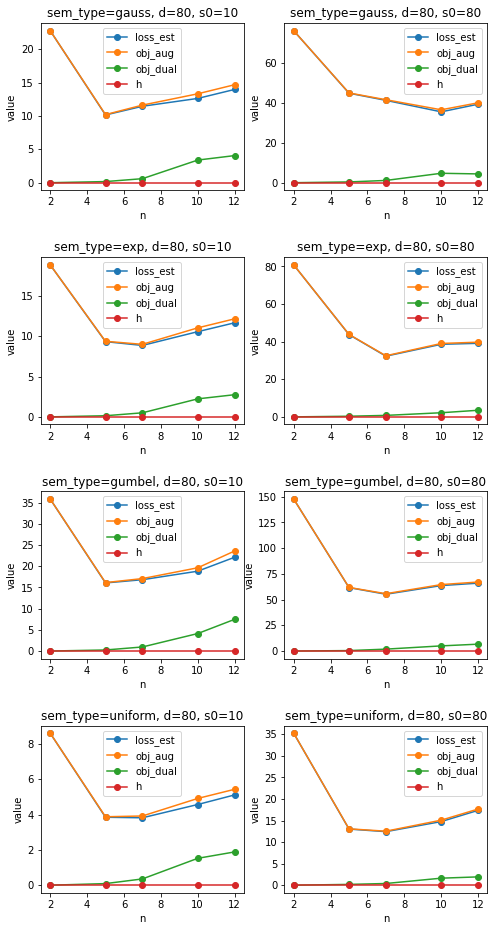

In [11]:
for i in range(20):
    if i == 0:
        result = pd.read_csv("./results_loss/result_"+str(i+9020)+".csv")
    else:
        result.iloc[:, 7:12] += pd.read_csv("./results_loss/result_"+str(i+9020)+".csv")
result.iloc[:, 7:12] /= 20
losses = ["loss_est", "obj_aug", "obj_dual", "h"] # "loss_l1"
semtypes = ["gauss", "exp", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 16))
colormap = plt.cm.tab10
s0s = [10, 80]
for i, s0 in enumerate(s0s):
    for j, sem_type in enumerate(semtypes):
        sem_subset = result[result['sem_type'] == sem_type]
        sem_subset = sem_subset[sem_subset['s0'] == s0]
        ax = axs[j, i]
        for p, loss_ in enumerate(losses):
            ax.plot(sem_subset['n'], sem_subset[loss_], marker='o', label=loss_, color=colormap(p))
        ax.set_xlabel('n')
        ax.set_ylabel("value")
        ax.set_title(f'sem_type={sem_type}, d=80, s0={s0}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

### Experiment 3

Here I set lambda1 $=0$, $n \in \{100, 500, 1000\}$, $d=10$ and $s0=d$.

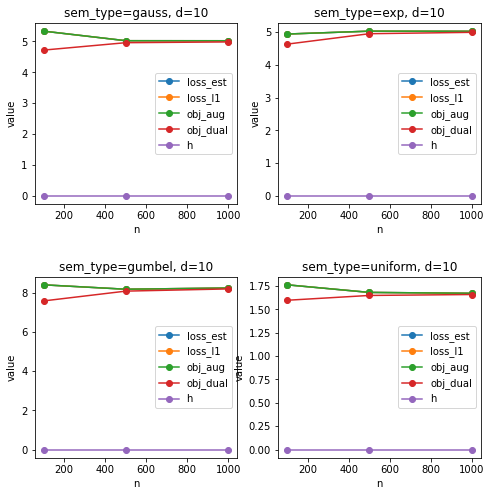

In [12]:
for i in range(20):
    if i == 0:
        result = pd.read_csv("./results_loss/result_"+str(i+9000)+".csv")
    else:
        result.iloc[:, 7:12] += pd.read_csv("./results_loss/result_"+str(i+9000)+".csv")
result.iloc[:, 7:12] /= 20
result = result[result['n'].isin([100, 500, 1000])]
losses = ["loss_est", "loss_l1", "obj_aug", "obj_dual", "h"]
semtypes = ["gauss", "exp", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
colormap = plt.cm.tab10
for j, sem_type in enumerate(semtypes):
    sem_subset = result[result['sem_type'] == sem_type]
    ax = axs[int(j/2), int(1-((j+1)/2-int((j+1)/2))*2)]
    for p, loss_ in enumerate(losses):
        ax.plot(sem_subset['n'], sem_subset[loss_], marker='o', label=loss_, color=colormap(p))
    ax.set_xlabel('n')
    ax.set_ylabel("value")
    ax.set_title(f'sem_type={sem_type}, d=10')
    ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

### Gains and reflection

 - When $n$ is fixed, as the $d$ gets bigger, the loss_est gets bigger, where obj_dual remains basically the same. ($n\leq d$)

 - When $d$ is fixed, as the $n$ gets bigger, the loss_est gets smaller fisrt and then go bigger, where obj_dual increases very slowly. ($n\leq d$)

 - When $d$ is fixed, as the $n$ gets extremely bigger, the loss_est and obj_dual keep constant and the difference loss_est-obj_dual seems to become smaller than in second experiment. ($n >> d$)


<font color="#660000">**Question: Why doesn't loss_est not approach zero?**</font><br /> 

Technically,

 - W_est[np.abs(W_est) < w_threshold] = 0 -> arbitrary threshold -> how about delete this code line? -> <font color="#660000">"2"</font><br /> 
 
 - scale_vec = np.zeros(d) -> this noise level may be too large to introduce more messy data -> scale_vec = np.zeros(d) * <font color="#660000">noise_scale</font><br />

 - if loss_type == 'l2': X = X - np.mean(X, axis=0, keepdims=True)

 Theoretically,

 - Considering the large gap between loss_est/obj_new and obj_dual, it may be that the systematic error of optimizing this problem is relatively large, rather than specific optimization steps.


**Ideas for the next experiment:**

 - Explore whether arbitrary threshold for W_est will effect the losses.

 - Will losses be zero if we set noise_scale to be smaller?

 - If losses cannot achieve zero, how do they compared to losses with regard to the global true W?




### Experiment 4

Here I set lambda1 $=0$, $d \in \{15, 25, 40, 60, 80\}$, $n=15$ and $s0=\{15, d\}$. 
 - Blue lines stand for original W_est and its losses.
 - Orange lines stand for W_est2 with "W_est[np.abs(W_est) < w_threshold] = 0" and its losses.
 - Green lines stand for true W and its losses.

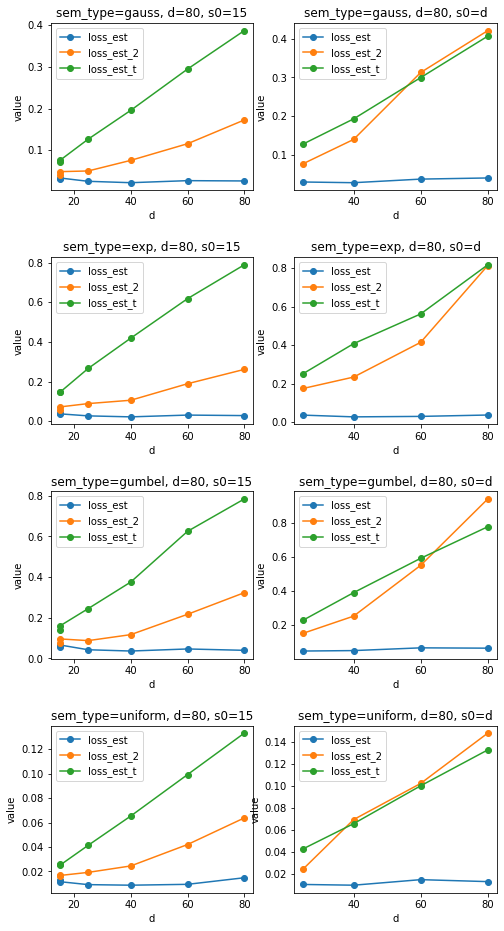

In [13]:
for i in range(6):
    if i == 0:
        result = pd.read_csv("./results_loss/result_"+str(i+9040)+".csv")
    else:
        result.iloc[:, 7:22] += pd.read_csv("./results_loss/result_"+str(i+9040)+".csv")
result.iloc[:, 7:22] /= 6
#losses = ["loss_est", "loss_l1", "obj_aug", "obj_dual", "h"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2", "h_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t", "h_t"]
#losses = ["h", "h_2", "h_t"]
losses = ["loss_est", "loss_est_2", "loss_est_t"]
semtypes = ["gauss", "exp", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 16))
colormap = plt.cm.tab10
s0s = [15, 80]
for i, s0 in enumerate(s0s):
    for j, sem_type in enumerate(semtypes):
        sem_subset = result[result['sem_type'] == sem_type]
        if i == 0:
            sem_subset = sem_subset[sem_subset['s0'] == s0]
            s00 = s0
        else:
            sem_subset = sem_subset[sem_subset['s0'] != 15]
            s00 = 'd'
        ax = axs[j, i]
        for p, loss_ in enumerate(losses):
            ax.plot(sem_subset['d'], sem_subset[loss_], marker='o', label=loss_, color=colormap(p))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title(f'sem_type={sem_type}, d=80, s0={s00}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

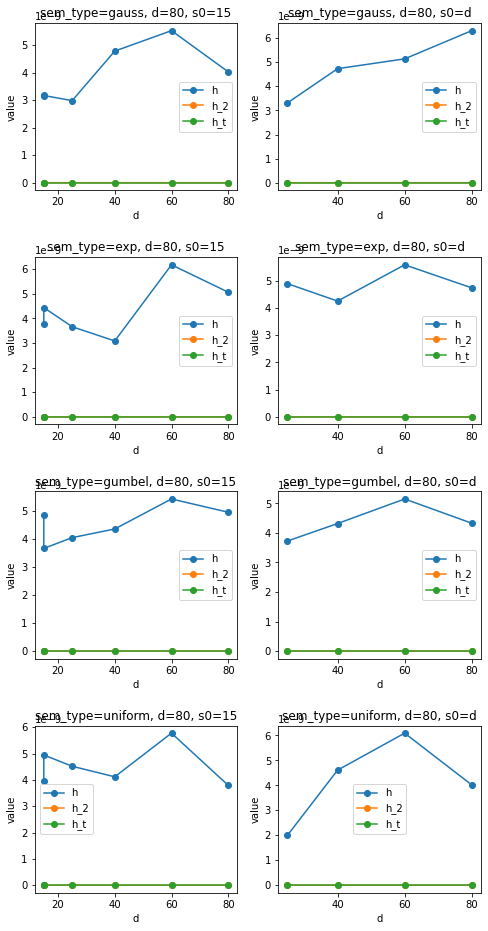

In [14]:
for i in range(6):
    if i == 0:
        result = pd.read_csv("./results_loss/result_"+str(i+9040)+".csv")
    else:
        result.iloc[:, 7:22] += pd.read_csv("./results_loss/result_"+str(i+9040)+".csv")
result.iloc[:, 7:22] /= 6
#losses = ["loss_est", "loss_l1", "obj_aug", "obj_dual", "h"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2", "h_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t", "h_t"]
losses = ["h", "h_2", "h_t"]
#losses = ["loss_est", "loss_est_2", "loss_est_t"]
semtypes = ["gauss", "exp", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 16))
colormap = plt.cm.tab10
s0s = [15, 80]
for i, s0 in enumerate(s0s):
    for j, sem_type in enumerate(semtypes):
        sem_subset = result[result['sem_type'] == sem_type]
        if i == 0:
            sem_subset = sem_subset[sem_subset['s0'] == s0]
            s00 = s0
        else:
            sem_subset = sem_subset[sem_subset['s0'] != 15]
            s00 = 'd'
        ax = axs[j, i]
        for p, loss_ in enumerate(losses):
            ax.plot(sem_subset['d'], sem_subset[loss_], marker='o', label=loss_, color=colormap(p))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title(f'sem_type={sem_type}, d=80, s0={s00}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

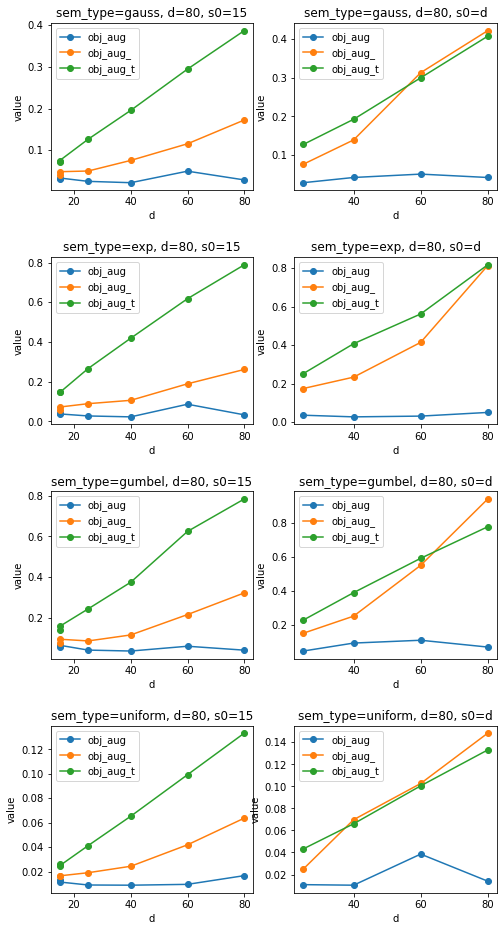

In [15]:
for i in range(6):
    if i == 0:
        result = pd.read_csv("./results_loss/result_"+str(i+9040)+".csv")
    else:
        result.iloc[:, 7:22] += pd.read_csv("./results_loss/result_"+str(i+9040)+".csv")
result.iloc[:, 7:22] /= 6
#losses = ["loss_est", "loss_l1", "obj_aug", "obj_dual", "h"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2", "h_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t", "h_t"]
#losses = ["h", "h_2", "h_t"]
#losses = ["loss_est", "loss_est_2", "loss_est_t"]
losses = ["obj_aug", "obj_aug_", "obj_aug_t"]
semtypes = ["gauss", "exp", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 16))
colormap = plt.cm.tab10
s0s = [15, 80]
for i, s0 in enumerate(s0s):
    for j, sem_type in enumerate(semtypes):
        sem_subset = result[result['sem_type'] == sem_type]
        if i == 0:
            sem_subset = sem_subset[sem_subset['s0'] == s0]
            s00 = s0
        else:
            sem_subset = sem_subset[sem_subset['s0'] != 15]
            s00 = 'd'
        ax = axs[j, i]
        for p, loss_ in enumerate(losses):
            ax.plot(sem_subset['d'], sem_subset[loss_], marker='o', label=loss_, color=colormap(p))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title(f'sem_type={sem_type}, d=80, s0={s00}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

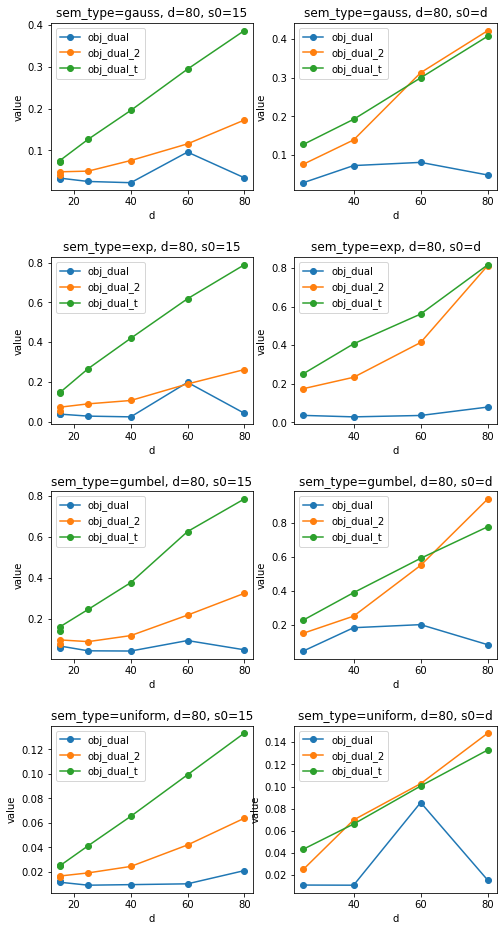

In [16]:
for i in range(6):
    if i == 0:
        result = pd.read_csv("./results_loss/result_"+str(i+9040)+".csv")
    else:
        result.iloc[:, 7:22] += pd.read_csv("./results_loss/result_"+str(i+9040)+".csv")
result.iloc[:, 7:22] /= 6
#losses = ["loss_est", "loss_l1", "obj_aug", "obj_dual", "h"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2", "h_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t", "h_t"]
#losses = ["h", "h_2", "h_t"]
#losses = ["loss_est", "loss_est_2", "loss_est_t"]
losses = ["obj_dual", "obj_dual_2", "obj_dual_t"]
semtypes = ["gauss", "exp", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 16))
colormap = plt.cm.tab10
s0s = [15, 80]
for i, s0 in enumerate(s0s):
    for j, sem_type in enumerate(semtypes):
        sem_subset = result[result['sem_type'] == sem_type]
        if i == 0:
            sem_subset = sem_subset[sem_subset['s0'] == s0]
            s00 = s0
        else:
            sem_subset = sem_subset[sem_subset['s0'] != 15]
            s00 = 'd'
        ax = axs[j, i]
        for p, loss_ in enumerate(losses):
            ax.plot(sem_subset['d'], sem_subset[loss_], marker='o', label=loss_, color=colormap(p))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title(f'sem_type={sem_type}, d=80, s0={s00}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

### New gains

 - Surprisingly, green lines and orange lines are more close, which means sparsely estimated W_est may behave more like true W.

 - Unfortunately, losses associated with estimated matrix are smaller. This may indicate some systematic problem in optimization problem or overfitting.

 - The constraint function computed by originally estimated W_est and W_est2 is not strictly 0 in some cases. The severity of the problem is uncertain.

 - Smaller noise_scale will lead to smaller losses, shorter running time, and smaller $h$.